In [1]:
# # Glomerulus - GrC connectivity
import numpy as np
import matplotlib.pyplot as plt

In [75]:
fname = "../fig_POPGEN/coords_20190626_1_1.npz"
f = np.load(fname)
f['grc_nop'].shape

(267187, 3)

In [76]:
def limit_to_box(x, box):
    mf = x.copy()
    for i, t in enumerate(box):
        mf = mf[mf[:, i] >= t[0], :]
        mf = mf[mf[:, i] <= t[1], :]
    return mf

In [77]:
def print_range(goc):
    print(
        "Current range:\n",
        "x: [{}, {}]\n".format(goc[:, 0].min(), goc[:, 0].max()),
        "y: [{}, {}]\n".format(goc[:, 1].min(), goc[:, 1].max()),
        "z: [{}, {}]".format(goc[:, 2].min(), goc[:, 2].max()),
    )

In [78]:
def fix_coords(x, bbox):
    y = x - 25
    y = limit_to_box(y, bbox)
    print_range(y)
    return y

In [79]:
bbox = [[0, 700], [0, 700], [0, 200]]
grc = fix_coords(f['grc_nop'], bbox)
glo = fix_coords(f['glo'], bbox)

Current range:
 x: [0.003944765146023599, 699.9953144750888]
 y: [0.002694796591811155, 699.9975472714127]
 z: [0.005286919214093189, 199.99992334117667]
Current range:
 x: [0.0003566497912323996, 699.9434720937548]
 y: [0.03680411733359179, 699.9969905094972]
 z: [0.0011508231361929688, 199.98956118528915]


In [98]:
scale_factor = 1/7

In [99]:
src = grc.copy()
tgt = glo.copy()
src[:, 1] *= scale_factor
tgt[:, 1] *= scale_factor

In [100]:
from sklearn.neighbors import NearestNeighbors

In [101]:
nn = NearestNeighbors()
nn.fit(tgt)
# conns = nn.radius_neighbors(src, radius=8.7, return_distance=False)
# nconns = np.frompyfunc(lambda x: x.size, 1, 1)(conns).astype(int)
# _ = plt.hist(nconns,np.arange(nconns.max()))
# print('Mean connection = {}'.format(np.mean(nconns))
      
conns = nn.kneighbors(src, n_neighbors=4, return_distance=False)


In [102]:
dendvs = np.vstack([glo[conn,:] - grc[i,:] for i, conn in enumerate(conns)])
dendlens = np.sqrt((dendvs**2).sum(axis=-1))
dendlens

array([11.38642138,  7.33505065,  7.76195521, ..., 14.93118195,
       11.473802  , 18.23386054])

In [103]:
dendlens.mean()

18.399190491005232

In [104]:
dendvs = [glo[conn,:] - grc[i,:] for i, conn in enumerate(conns) if conn.size>0]

6.693358147688607±2.2228920344751


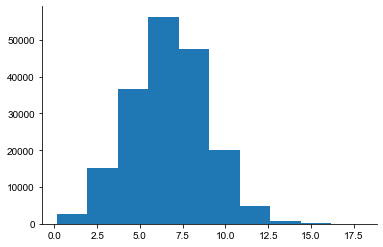

In [105]:
ml_spread = np.array([z[:,0].max()-z[:,0].min() for z in dendvs])

plt.hist(ml_spread)
print('{}±{}'.format(ml_spread.mean(), ml_spread.std()))

46.73232629041077±13.319617573163928


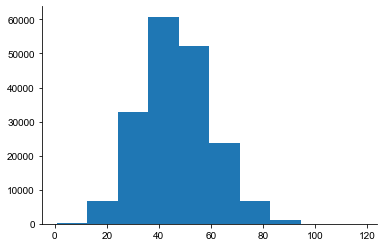

In [106]:
sg_spread = np.array([z[:,1].max()-z[:,1].min() for z in dendvs])

plt.hist(sg_spread)
print('{}±{}'.format(sg_spread.mean(), sg_spread.std()))